# The Movies Dataset 
## Pamella Bezerra (pbsf2@cin.ufpe.br)

## [Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7)

### [Click here](https://github.com/pamella/if706-data-science/blob/master/the_movies_dataset_preprocessing.ipynb) to see the complete Pre-Processing notebook.


In [0]:
# Commom imports
import numpy as np
import pandas as pd
import re #regex
from numpy import log10, abs

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/pamella/data-science/master/movies_metadata.csv", encoding="ISO-8859-1")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [90]:
print('df shape: ', df.shape)

df shape:  (45466, 24)


# Pre-processing data

## Set initial fields type
(mostly category)

In [91]:
# Pandas data types
# https://pbpython.com/pandas_dtypes.html
df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [0]:
# Set columns types
df['adult'] = df['adult'].astype('category')
df['belongs_to_collection'] = df['belongs_to_collection'].astype('category')
df['budget'] = df['budget'].astype('category')
df['genres'] = df['genres'].astype('category')
df['homepage'] = df['homepage'].astype('category')
df['id'] = df['id'].astype('category')
df['imdb_id'] = df['imdb_id'].astype('category')
df['original_language'] = df['original_language'].astype('category')
df['original_title'] = df['original_title'].astype('category')
df['overview'] = df['overview'].astype('category')
df['popularity'] = df['popularity'].astype('category')
df['poster_path'] = df['poster_path'].astype('category')
df['production_companies'] = df['production_companies'].astype('category')
df['production_countries'] = df['production_countries'].astype('category')
df['release_date'] = df['release_date'].astype('category')
df['spoken_languages'] = df['spoken_languages'].astype('category')
df['status'] = df['status'].astype('category')
df['tagline'] = df['tagline'].astype('category')
df['title'] = df['title'].astype('category')
df['video'] = df['video'].astype('category')

In [93]:
df.dtypes

adult                    category
belongs_to_collection    category
budget                   category
genres                   category
homepage                 category
id                       category
imdb_id                  category
original_language        category
original_title           category
overview                 category
popularity               category
poster_path              category
production_companies     category
production_countries     category
release_date             category
revenue                   float64
runtime                   float64
spoken_languages         category
status                   category
tagline                  category
title                    category
video                    category
vote_average              float64
vote_count                float64
dtype: object

### [P.S] Evidence to future insert missing data into runtime column 

In [94]:
print('Runtime mean: ', df['runtime'].mean())
print('Runtime median: ', df['runtime'].median())

Runtime mean:  94.12819945578833
Runtime median:  95.0


## Manage columns which values are a list of dictionaries
**(using regex)**

In [95]:
df[['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [96]:
# examples of regex to get the chosen pattern
print ('BELONGS TO COLLECTION')
belongs_to_collection = df['belongs_to_collection'][0]
print('Row: ', belongs_to_collection)
pattern = re.search(r"'name':\ '([^']*)'", belongs_to_collection).group(1)
print('Pattern: ', pattern, '\n')


print ('GENRE')
genres = df['genres'][0]
print('Row: ', genres)
pattern = re.search(r"'name':\ '([^']*)'", genres).group(1)
print('Pattern: ', pattern, '\n')


print ('PRODUCTION COMPANIE')
production_companies = df['production_companies'][0]
print('Row: ', production_companies)
pattern = re.search(r"'name':\ '([^']*)'", production_companies).group(1)
print('Pattern: ', pattern, '\n')


print ('PRODUCTION COUNTRY')
production_countries = df['production_countries'][0]
print('Row: ', production_countries)
pattern = re.search(r"'name':\ '([^']*)'", production_countries).group(1)
print('Pattern: ', pattern, '\n')


print ('SPOKEN LANGUAGE')
spoken_languages = df['spoken_languages'][0]
print('Row: ', spoken_languages)
pattern = re.search(r"'name':\ '([^']*)'", spoken_languages).group(1)
print('Pattern: ', pattern, '\n')

BELONGS TO COLLECTION
Row:  {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
Pattern:  Toy Story Collection 

GENRE
Row:  [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
Pattern:  Animation 

PRODUCTION COMPANIE
Row:  [{'name': 'Pixar Animation Studios', 'id': 3}]
Pattern:  Pixar Animation Studios 

PRODUCTION COUNTRY
Row:  [{'iso_3166_1': 'US', 'name': 'United States of America'}]
Pattern:  United States of America 

SPOKEN LANGUAGE
Row:  [{'iso_639_1': 'en', 'name': 'English'}]
Pattern:  English 



In [0]:
# Replace a list of dictionary with one category string
df['belongs_to_collection'] = df['belongs_to_collection'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['genres'] = df['genres'].str.extract(r":\ '([^']*)'", expand=False)
df['production_companies'] = df['production_companies'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['production_countries'] = df['production_countries'].str.extract(r"'name':\ '([^']*)'", expand=False)
df['spoken_languages'] = df['spoken_languages'].str.extract(r"'name':\ '([^']*)'", expand=False)


In [98]:
df[['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages
0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English
1,NaN,Adventure,TriStar Pictures,United States of America,English
2,Grumpy Old Men Collection,Romance,Warner Bros.,United States of America,English
3,NaN,Comedy,Twentieth Century Fox Film Corporation,United States of America,English
4,Father of the Bride Collection,Comedy,Sandollar Productions,United States of America,English


## Manage bool column

In [99]:
df.dtypes

adult                    category
belongs_to_collection      object
budget                   category
genres                     object
homepage                 category
id                       category
imdb_id                  category
original_language        category
original_title           category
overview                 category
popularity               category
poster_path              category
production_companies       object
production_countries       object
release_date             category
revenue                   float64
runtime                   float64
spoken_languages           object
status                   category
tagline                  category
title                    category
video                    category
vote_average              float64
vote_count                float64
dtype: object

In [100]:
print('adult values: ', list(df['adult'].unique()))

adult values:  ['False', 'True', ' - Written by Ã\x98rnÃ¥s', ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']


In [0]:
# Replace string to bool
df['adult'].replace('True', True, inplace=True)
df['adult'].replace('False', False, inplace=True)
df['adult'].replace(' - Written by Ã\x98rnÃ¥s', False, inplace=True)
df['adult'].replace(' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.', False, inplace=True)
df['adult'].replace(' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.', False, inplace=True)

In [102]:
print('adult values: ', list(df['adult'].unique()))

adult values:  [False, True]


## Remove almost empty columns and almost empty rows

In [103]:
df.shape

(45466, 24)

In [104]:
print(df.isnull().sum())

adult                        0
belongs_to_collection    41082
budget                       0
genres                    2442
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies     11939
production_countries      6289
release_date                87
revenue                      6
runtime                    263
spoken_languages          3835
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [0]:
# Remove columns with less than 70% missing data
df = df.dropna(thresh=0.7*len(df), axis=1)

# Remove instances with less than 70% missing data
df = df.dropna(thresh=0.7*len(df.columns), axis=0)

In [106]:
print('shape', df.shape)
print('\n')
print(df.isnull().sum())

shape (45442, 21)


adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
overview                  937
popularity                  0
poster_path               371
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                   241
spoken_languages         3811
status                     77
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64


## Remove unused columns during analysis

In [107]:
print('columns: ', list(df.columns))
print('len: ', len(df.columns))

columns:  ['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video', 'vote_average', 'vote_count']
len:  21


In [108]:
# overview: text for movie synopsis
# poster_path: relative path for movie poster image
# video: boolean

df[['overview', 'poster_path', 'video']].head()

,overview,poster_path,video
0,"Led by Woody, Andy's toys live happily in his ...",/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,False
1,When siblings Judy and Peter discover an encha...,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,False
2,A family wedding reignites the ancient feud be...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,False
3,"Cheated on, mistreated and stepped on, the wom...",/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,False
4,Just when George Banks has recovered from his ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,False


In [109]:
df = df.drop(['overview', 'poster_path', 'video'], axis=1)
print('columns: ', list(df.columns))
print('len: ', len(df.columns))

columns:  ['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language', 'original_title', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'vote_average', 'vote_count']
len:  18


## Inserting missing data into 'runtime' (float) column

In [110]:
print(df.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                   241
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [111]:
print('Runtime mean: ', df['runtime'].mean())
print('Runtime median: ', df['runtime'].median())

Runtime mean:  94.13236432822282
Runtime median:  95.0


In [0]:
# Insert median in the runtime's missing data
df['runtime'].fillna(df['runtime'].median(), inplace=True)

In [113]:
# print(df.isnull().sum())
print('null runtime instances: ', df['runtime'].isnull().sum())

null runtime instances:  0


In [114]:
print('runtime zero: ', len(df[df['runtime'] == 0]))

# Insert median when runtime instance is zero
df.loc[df['runtime'] == 0, 'runtime'] = df['runtime'].median()

print('new runtime zero: ', len(df[df['runtime'] == 0]))

runtime zero:  1556
new runtime zero:  0


In [115]:
# Here we can see another 'strange' pattern such min value, but this is going to be treated later
df['runtime'].describe()

count    45442.000000
mean        97.389904
std         33.956036
min          1.000000
25%         87.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

## Remove instances with missing data --> df2

In [116]:
# current df info
print('len: ', len(df))
print('\n')
print(df.isnull().sum())

len:  45442


adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [0]:
# Create a devirate dataframe without instances with missing data --> df2
df2 = df.copy()
df2 = df2.dropna()

In [118]:
# New dataframe, df2, info
print('len: ', len(df2))
print('\n')
print(df2.isnull().sum())

len:  32015


adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


## Update fields type


In [119]:
df2.dtypes

adult                       bool
budget                  category
genres                    object
id                      category
imdb_id                 category
original_language       category
original_title          category
popularity              category
production_companies      object
production_countries      object
release_date            category
revenue                  float64
runtime                  float64
spoken_languages          object
status                  category
title                   category
vote_average             float64
vote_count               float64
dtype: object

In [0]:
# Update columns types
df2['genres'] = df2['genres'].astype('category')
df2['production_companies'] = df2['production_companies'].astype('category')
df2['production_countries'] = df2['production_countries'].astype('category')
df2['spoken_languages'] = df2['spoken_languages'].astype('category')
df2['budget'] = df2['budget'].astype('float64')
df2['id'] = df2['id'].astype('int64')
df2['popularity'] = df2['popularity'].astype('float64')
df2['release_date'] = df2['release_date'].astype('datetime64')

In [121]:
# After updating
df2.dtypes

adult                             bool
budget                         float64
genres                        category
id                               int64
imdb_id                       category
original_language             category
original_title                category
popularity                     float64
production_companies          category
production_countries          category
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages              category
status                        category
title                         category
vote_average                   float64
vote_count                     float64
dtype: object

## Remove duplicated instances

In [122]:
# Show duplicated instances
df2[df2.duplicated()].sort_values('original_title')

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
13375,False,0.0,Thriller,141971,tt1180333,fi,Blackout,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Blackout,6.7,3.0
16764,False,0.0,Thriller,141971,tt1180333,fi,Blackout,0.411949,Filmiteollisuus Fine,Finland,2008-12-26,0.0,108.0,suomi,Released,Blackout,6.7,3.0
1465,False,0.0,Drama,105045,tt0111613,de,Das Versprechen,0.122178,Studio Babelsberg,Germany,1995-02-16,0.0,115.0,Deutsch,Released,The Promise,5.0,1.0
24844,False,0.0,Comedy,11115,tt0446676,en,Deal,6.880365,Andertainment Group,United States of America,2008-01-29,0.0,85.0,English,Released,Deal,5.2,22.0
29374,False,0.0,Drama,42495,tt0067306,en,King Lear,0.187901,Royal Shakespeare Company,Denmark,1971-02-04,0.0,137.0,English,Rumored,King Lear,8.0,3.0
9165,False,0.0,Crime,5511,tt0062229,fr,Le SamouraÃ¯,9.091288,Fida cinematografica,France,1967-10-25,39481.0,105.0,FranÃ§ais,Released,Le SamouraÃ¯,7.9,187.0
40276,False,0.0,Comedy,97995,tt0127834,en,Seven Years Bad Luck,0.141558,Max Linder Productions,United States of America,1921-02-06,0.0,62.0,English,Released,Seven Years Bad Luck,5.6,4.0
21854,False,0.0,Drama,152795,tt1821641,en,The Congress,8.534039,Pandora Filmproduktion,Belgium,2013-05-16,455815.0,122.0,English,Released,The Congress,6.4,165.0
9327,False,0.0,Adventure,23305,tt0295682,en,The Warrior,1.967992,Filmfour,France,2001-09-23,0.0,86.0,à¤¹à¤¿à¤¨à¥à¤¦à¥,Released,The Warrior,6.3,15.0
45265,False,0.0,Comedy,265189,tt2121382,sv,Turist,12.165685,Motlys,Norway,2014-08-15,1359497.0,118.0,FranÃ§ais,Released,Force Majeure,6.8,255.0


In [123]:
print('duplicated instances: ', len(df2[df2.duplicated()].sort_values('original_title')))

duplicated instances:  11


In [124]:
# Remove duplicated instances
df2.drop_duplicates(keep = False, inplace = True)
print('df2 new len: ', len(df2))

df2 new len:  31994


## KNN to insert missing data --> df_knn

In this section, I am going to use **df**, the first dataframe which has instances with missing data.


I've tried to run KNN, but the processor crashed due to dataframe size. So, I removed instances when **budget** and **revenue** was zero, considering it as float missing data. I did that to shorter the dataframe to be able to test the KNN insert method.

P.S.: Later in this notebook, I will discuss more why considering zero as float missing data.

In [125]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,False,30000000,Animation,862,tt0114709,en,Toy Story,21.9469,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Released,Toy Story,7.7,5415.0
1,False,65000000,Adventure,8844,tt0113497,en,Jumanji,17.0155,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,English,Released,Jumanji,6.9,2413.0
2,False,0,Romance,15602,tt0113228,en,Grumpier Old Men,11.7129,Warner Bros.,United States of America,1995-12-22,0.0,101.0,English,Released,Grumpier Old Men,6.5,92.0
3,False,16000000,Comedy,31357,tt0114885,en,Waiting to Exhale,3.85949,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Released,Waiting to Exhale,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,8.38752,Sandollar Productions,United States of America,1995-02-10,76578911.0,106.0,English,Released,Father of the Bride Part II,5.7,173.0


In [126]:
df_knn = df.copy()
print(df_knn.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                    16
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                     77
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [127]:
df_knn.dtypes

adult                       bool
budget                  category
genres                    object
id                      category
imdb_id                 category
original_language       category
original_title          category
popularity              category
production_companies      object
production_countries      object
release_date            category
revenue                  float64
runtime                  float64
spoken_languages          object
status                  category
title                   category
vote_average             float64
vote_count               float64
dtype: object

For some reason, **NaN** cells weren't being recognized as **numpy NaN** and due to that its values had been replaced by **-1 as cat codes**. So, I've manually fixed it to be able to run KNN.

In [128]:
print('NaN genres instances: ', len(df_knn[df_knn['genres'] == np.NaN]))
df_knn[45440:45442]

NaN genres instances:  0


,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45464,False,0,NaN,227506,tt0008536,en,Satana likuyushchiy,0.003503,Yermoliev,Russia,1917-10-21,0.0,87.0,NaN,Released,Satan Triumphant,0.0,0.0
45465,False,0,NaN,461257,tt6980792,en,Queerama,0.163015,NaN,United Kingdom,2017-06-09,0.0,75.0,English,Released,Queerama,0.0,0.0


In [0]:
# Update columns types
df_knn['genres'] = df_knn['genres'].astype('category')
df_knn['production_companies'] = df_knn['production_companies'].astype('category')
df_knn['production_countries'] = df_knn['production_countries'].astype('category')
df_knn['spoken_languages'] = df_knn['spoken_languages'].astype('category')
df_knn['budget'] = df_knn['budget'].astype('float64')
df_knn['id'] = df_knn['id'].astype('int64')
df_knn['popularity'] = df_knn['popularity'].astype('float64')
# float() argument must be a string or a number, not 'Timestamp'
df_knn['release_date'] = df_knn['release_date'].astype('category')


# get cat codes
df_knn['genres'] = df_knn['genres'].cat.codes
df_knn['imdb_id'] = df_knn['imdb_id'].cat.codes
df_knn['original_language'] = df_knn['original_language'].cat.codes
df_knn['original_title'] = df_knn['original_title'].cat.codes
df_knn['production_companies'] = df_knn['production_companies'].cat.codes
df_knn['production_countries'] = df_knn['production_countries'].cat.codes
df_knn['spoken_languages'] = df_knn['spoken_languages'].cat.codes
df_knn['status'] = df_knn['status'].cat.codes
df_knn['title'] = df_knn['title'].cat.codes
df_knn['release_date'] = df_knn['release_date'].cat.codes


In [130]:
df_knn[45440:45442]

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45464,False,0.0,-1,227506,170,20,27129,0.003503,10321,106,243,0.0,87.0,-1,4,26679,0.0,0.0
45465,False,0.0,-1,461257,45408,20,25602,0.163015,-1,133,17274,0.0,75.0,15,4,25071,0.0,0.0


In [131]:
print(df_knn.isnull().sum())

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [0]:
df_knn['genres'].replace(-1, np.nan, inplace=True)
df_knn['original_language'].replace(-1, np.nan, inplace=True)
df_knn['production_companies'].replace(-1, np.nan, inplace=True)
df_knn['production_countries'].replace(-1, np.nan, inplace=True)
df_knn['release_date'].replace(-1, np.nan, inplace=True)
df_knn['spoken_languages'].replace(-1, np.nan, inplace=True)


In [133]:
df_knn.tail()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
45461,False,0.0,6.0,439050,45274,25.0,41020,0.072051,NaN,57.0,NaN,0.0,90.0,60.0,4,29278,4.0,1.0
45462,False,0.0,6.0,111109,37205,82.0,28085,0.178241,8519.0,100.0,15390.0,0.0,360.0,0.0,4,6516,9.0,3.0
45463,False,0.0,0.0,67758,23291,20.0,3995,0.903007,500.0,135.0,12720.0,0.0,90.0,15.0,4,4377,3.8,6.0
45464,False,0.0,NaN,227506,170,20.0,27129,0.003503,10321.0,106.0,243.0,0.0,87.0,NaN,4,26679,0.0,0.0
45465,False,0.0,NaN,461257,45408,20.0,25602,0.163015,NaN,133.0,17274.0,0.0,75.0,15.0,4,25071,0.0,0.0


In [134]:
print(df_knn.isnull().sum())

adult                       0
budget                      0
genres                   2425
id                          0
imdb_id                     0
original_language          11
original_title              0
popularity                  0
production_companies    11915
production_countries     6265
release_date               74
revenue                     0
runtime                     0
spoken_languages         3811
status                      0
title                       0
vote_average                0
vote_count                  0
dtype: int64


In [135]:
df_cc = df_knn.iloc[:, 0:18]
print('df_knn len: ', len(df_knn))

# Remove float zero data (missing float data)
df_knn = df_knn.loc[(df_knn['budget'] > 0) | (df_knn['revenue'] > 0)]
print('df_knn len without float zero data: ', len(df_knn))

df_knn len:  45442
df_knn len without float zero data:  10917


In [136]:
from fancyimpute import KNN
df_knn = KNN(k=5).fit_transform(df_knn)

Imputing row 1/10917 with 0 missing, elapsed time: 23.735
Imputing row 101/10917 with 0 missing, elapsed time: 23.736
Imputing row 201/10917 with 0 missing, elapsed time: 23.737
Imputing row 301/10917 with 0 missing, elapsed time: 23.737
Imputing row 401/10917 with 0 missing, elapsed time: 23.738
Imputing row 501/10917 with 0 missing, elapsed time: 23.739
Imputing row 601/10917 with 0 missing, elapsed time: 23.740
Imputing row 701/10917 with 0 missing, elapsed time: 23.740
Imputing row 801/10917 with 0 missing, elapsed time: 23.741
Imputing row 901/10917 with 0 missing, elapsed time: 23.742
Imputing row 1001/10917 with 0 missing, elapsed time: 23.743
Imputing row 1101/10917 with 0 missing, elapsed time: 23.744
Imputing row 1201/10917 with 0 missing, elapsed time: 23.744
Imputing row 1301/10917 with 0 missing, elapsed time: 23.745
Imputing row 1401/10917 with 0 missing, elapsed time: 23.746
Imputing row 1501/10917 with 0 missing, elapsed time: 23.747
Imputing row 1601/10917 with 0 missi

In [137]:
df_knn.shape

(10917, 18)

In [138]:
dataset = pd.DataFrame({
            'adult':df_knn[:,0],'budget':df_knn[:,1],'genres':df_knn[:,2],'id':df_knn[:,3],'imdb_id':df_knn[:,4],
            'original_language':df_knn[:,5],'original_title':df_knn[:,6],'popularity':df_knn[:,7],'production_companies':df_knn[:,8],'production_countries':df_knn[:,9],
            'release_date':df_knn[:,10],'revenue':df_knn[:,11],'runtime':df_knn[:,12],'spoken_languages':df_knn[:,13],'status':df_knn[:,14],
            'title':df_knn[:,15],'vote_average':df_knn[:,16],'vote_count':df_knn[:,17],
          })

dataset.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,0.0,30000000.0,2.0,862.0,17052.0,20.0,36902.0,21.946943,7296.0,135.0,10677.0,373554033.0,81.0,15.0,4.0,39018.0,7.7,5415.0
1,0.0,65000000.0,1.0,8844.0,16812.0,20.0,16241.0,17.015539,9561.0,135.0,10708.0,262797249.0,104.0,15.0,4.0,16806.0,6.9,2413.0
2,0.0,16000000.0,3.0,31357.0,17082.0,20.0,38527.0,3.859495,9640.0,135.0,10713.0,81452156.0,127.0,15.0,4.0,40428.0,6.1,34.0
3,0.0,0.0,3.0,11862.0,16703.0,20.0,10835.0,8.387519,8201.0,135.0,10509.0,76578911.0,106.0,15.0,4.0,11199.0,5.7,173.0
4,0.0,60000000.0,0.0,949.0,16769.0,20.0,13372.0,17.924927,7826.0,135.0,10708.0,187436818.0,170.0,15.0,4.0,13962.0,7.7,1886.0


# Predictive Models

In [139]:
pip install scipy==1.2 --upgrade

Requirement already up-to-date: scipy==1.2 in /usr/local/lib/python3.6/dist-packages (1.2.0)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In order to **measure the model performance**, we'll take as argument two metrics:
- **R2 Score (R2)**
  - Provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model --> that is, measure of how well the regression predictions approximate the real data points.
  - Values closer to one are better.
- **Mean Squared Error (MSE)**
  - Measures the average of the squares of the errors --> that is, the average squared difference between the estimated values and what is estimated.
  - Values closer to zero are better.

In [0]:
# Measure Model Performance

from sklearn.metrics import r2_score, mean_squared_error

**Chosen Dataset**

In order to apply machine learning models, I decide to use the dataset from KNN.

In [142]:
dataset = dataset[[
            'id','imdb_id','adult','genres','title',
            'original_title','production_countries','production_companies','spoken_languages','original_language',
            'release_date','budget','popularity','vote_count','vote_average',
            'runtime','status', 'revenue',
]]

dataset.head()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
0,862.0,17052.0,0.0,2.0,39018.0,36902.0,135.0,7296.0,15.0,20.0,10677.0,30000000.0,21.946943,5415.0,7.7,81.0,4.0,373554033.0
1,8844.0,16812.0,0.0,1.0,16806.0,16241.0,135.0,9561.0,15.0,20.0,10708.0,65000000.0,17.015539,2413.0,6.9,104.0,4.0,262797249.0
2,31357.0,17082.0,0.0,3.0,40428.0,38527.0,135.0,9640.0,15.0,20.0,10713.0,16000000.0,3.859495,34.0,6.1,127.0,4.0,81452156.0
3,11862.0,16703.0,0.0,3.0,11199.0,10835.0,135.0,8201.0,15.0,20.0,10509.0,0.0,8.387519,173.0,5.7,106.0,4.0,76578911.0
4,949.0,16769.0,0.0,0.0,13962.0,13372.0,135.0,7826.0,15.0,20.0,10708.0,60000000.0,17.924927,1886.0,7.7,170.0,4.0,187436818.0


In [143]:
dataset.tail()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
10912,293654.0,42528.0,0.0,3.0,7665.0,40597.0,106.000000,3021.000000,36.000000,68.0,16371.0,2000000.0,0.524370,4.0,3.5,89.0,4.0,0.0
10913,100152.0,26024.0,0.0,3.0,20066.0,40642.0,134.639232,3930.145453,20.011771,68.0,13099.0,2000000.0,0.380933,2.0,5.0,100.0,4.0,0.0
10914,62757.0,29580.0,0.0,3.0,26723.0,8744.0,80.982569,3730.565701,36.000000,20.0,13730.0,800000.0,0.903061,6.0,5.8,100.0,4.0,1328612.0
10915,63281.0,35472.0,0.0,14.0,24806.0,40793.0,106.000000,7512.000000,36.000000,20.0,15009.0,2000000.0,0.121844,3.0,4.0,107.0,4.0,1268793.0
10916,63898.0,30788.0,0.0,0.0,2869.0,40325.0,106.000000,3783.449227,36.000000,68.0,13984.0,5000000.0,0.039793,1.0,1.0,91.0,4.0,1413000.0


## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

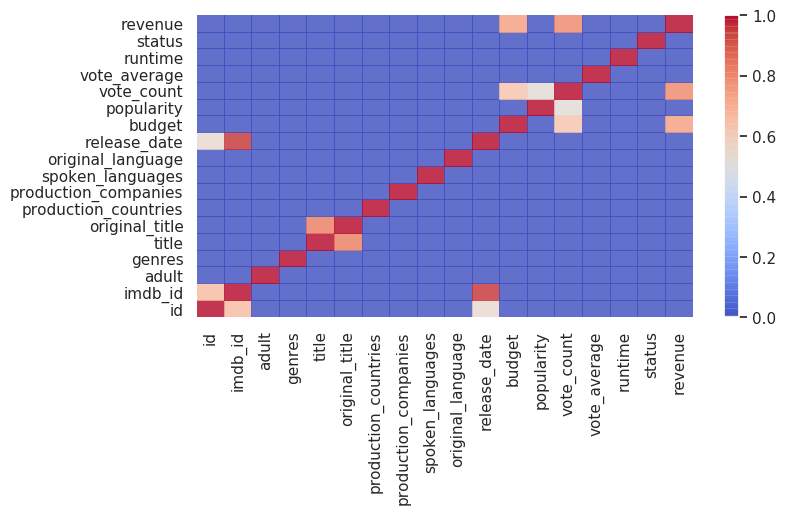

In [145]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(data.columns, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(data.columns, minor=False)
    plt.tick_params(axis='True', which='True', bottom='True', top='False', left = 'False', right = 'False')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(dataset, hurdle=0.5)

W0615 02:15:00.662376 139704412403584 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
W0615 02:15:00.713537 139704412403584 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
W0615 02:15:00.773808 139704412403584 _axes.py:4217] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all 

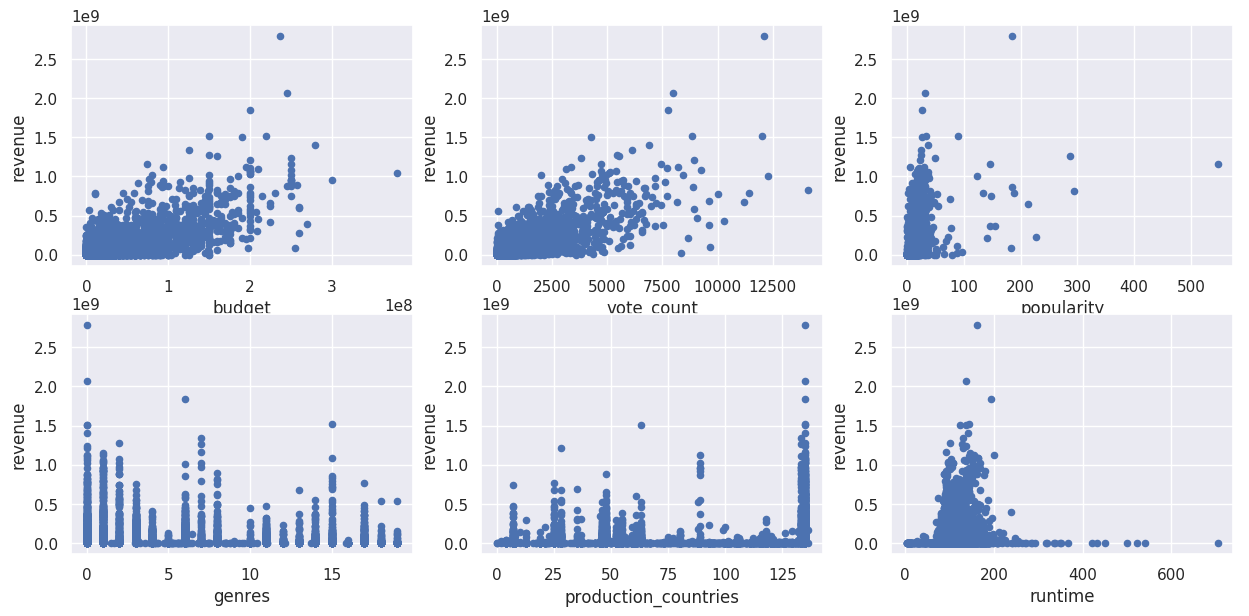

In [146]:
figs, axes = plt.subplots(2,3,figsize=(15,7))

# Plots
dataset[['budget','revenue']].plot.scatter(x='budget',y='revenue',ax=axes[0,0])
dataset[['vote_count','revenue']].plot.scatter(x='vote_count',y='revenue',ax=axes[0,1])
dataset[['popularity','revenue']].plot.scatter(x='popularity',y='revenue',ax=axes[0,2])

dataset[['genres','revenue']].plot.scatter(x='genres',y='revenue',ax=axes[1,0])
dataset[['production_countries','revenue']].plot.scatter(x='production_countries',y='revenue',ax=axes[1,1])
dataset[['runtime','revenue']].plot.scatter(x='runtime',y='revenue',ax=axes[1,2])

### **revenue** column as target - 2 variables




In [147]:
datasetAux = dataset[['budget','popularity', 'revenue',]]

datasetAux.head()

,budget,popularity,revenue
0,30000000.0,21.946943,373554033.0
1,65000000.0,17.015539,262797249.0
2,16000000.0,3.859495,81452156.0
3,0.0,8.387519,76578911.0
4,60000000.0,17.924927,187436818.0


R2: 0.596
MSE: 6295283747940620.000

Coefficients: [[2.54166971e+00 2.79265021e+06]]


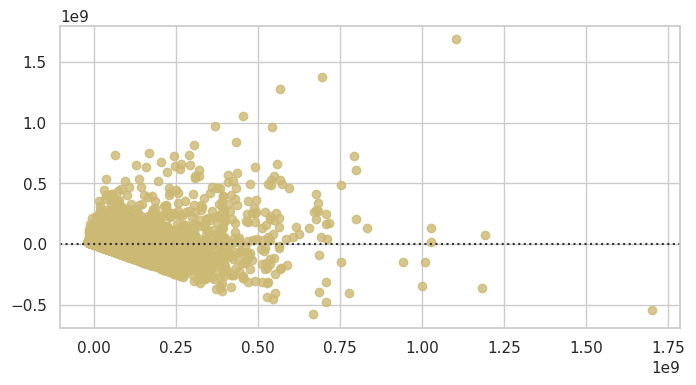

In [148]:
# Model initialize
model = LinearRegression()

model.fit(datasetAux.iloc[:, 0:2], datasetAux[['revenue']])


# Predict Model
predict = model.predict(datasetAux.iloc[:, 0:2])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="y")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

### **revenue** column as target - All variables

In [149]:
datasetAux = dataset.iloc[:, 0:18]

datasetAux.head()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
0,862.0,17052.0,0.0,2.0,39018.0,36902.0,135.0,7296.0,15.0,20.0,10677.0,30000000.0,21.946943,5415.0,7.7,81.0,4.0,373554033.0
1,8844.0,16812.0,0.0,1.0,16806.0,16241.0,135.0,9561.0,15.0,20.0,10708.0,65000000.0,17.015539,2413.0,6.9,104.0,4.0,262797249.0
2,31357.0,17082.0,0.0,3.0,40428.0,38527.0,135.0,9640.0,15.0,20.0,10713.0,16000000.0,3.859495,34.0,6.1,127.0,4.0,81452156.0
3,11862.0,16703.0,0.0,3.0,11199.0,10835.0,135.0,8201.0,15.0,20.0,10509.0,0.0,8.387519,173.0,5.7,106.0,4.0,76578911.0
4,949.0,16769.0,0.0,0.0,13962.0,13372.0,135.0,7826.0,15.0,20.0,10708.0,60000000.0,17.924927,1886.0,7.7,170.0,4.0,187436818.0


In [150]:
datasetAux.shape

(10917, 18)

R2: 0.733
MSE: 4153937979286417.000

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


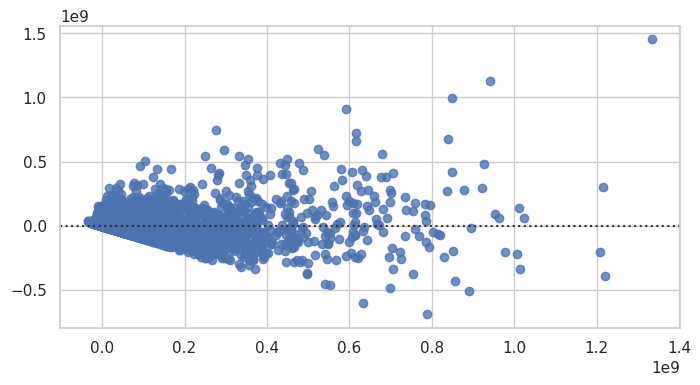

In [151]:
# Model initialize
model = LinearRegression()

model.fit(datasetAux.iloc[:, 0:17], datasetAux[['revenue']])


# Predict Model
predict = model.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="b")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

## Random Forest


> **Documentation definition:** *A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if `bootstrap=True` (default).*



In [0]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
datasetAux = dataset.iloc[:, 0:18]

datasetAux.head()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
0,862.0,17052.0,0.0,2.0,39018.0,36902.0,135.0,7296.0,15.0,20.0,10677.0,30000000.0,21.946943,5415.0,7.7,81.0,4.0,373554033.0
1,8844.0,16812.0,0.0,1.0,16806.0,16241.0,135.0,9561.0,15.0,20.0,10708.0,65000000.0,17.015539,2413.0,6.9,104.0,4.0,262797249.0
2,31357.0,17082.0,0.0,3.0,40428.0,38527.0,135.0,9640.0,15.0,20.0,10713.0,16000000.0,3.859495,34.0,6.1,127.0,4.0,81452156.0
3,11862.0,16703.0,0.0,3.0,11199.0,10835.0,135.0,8201.0,15.0,20.0,10509.0,0.0,8.387519,173.0,5.7,106.0,4.0,76578911.0
4,949.0,16769.0,0.0,0.0,13962.0,13372.0,135.0,7826.0,15.0,20.0,10708.0,60000000.0,17.924927,1886.0,7.7,170.0,4.0,187436818.0


### Default hyperparameters

In [154]:
rcParams['figure.figsize'] = (20, 8)

# Model initialize
regr = RandomForestRegressor()
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x7f0f232c66d8>,
 <a list of 17 Text xticklabel objects>)

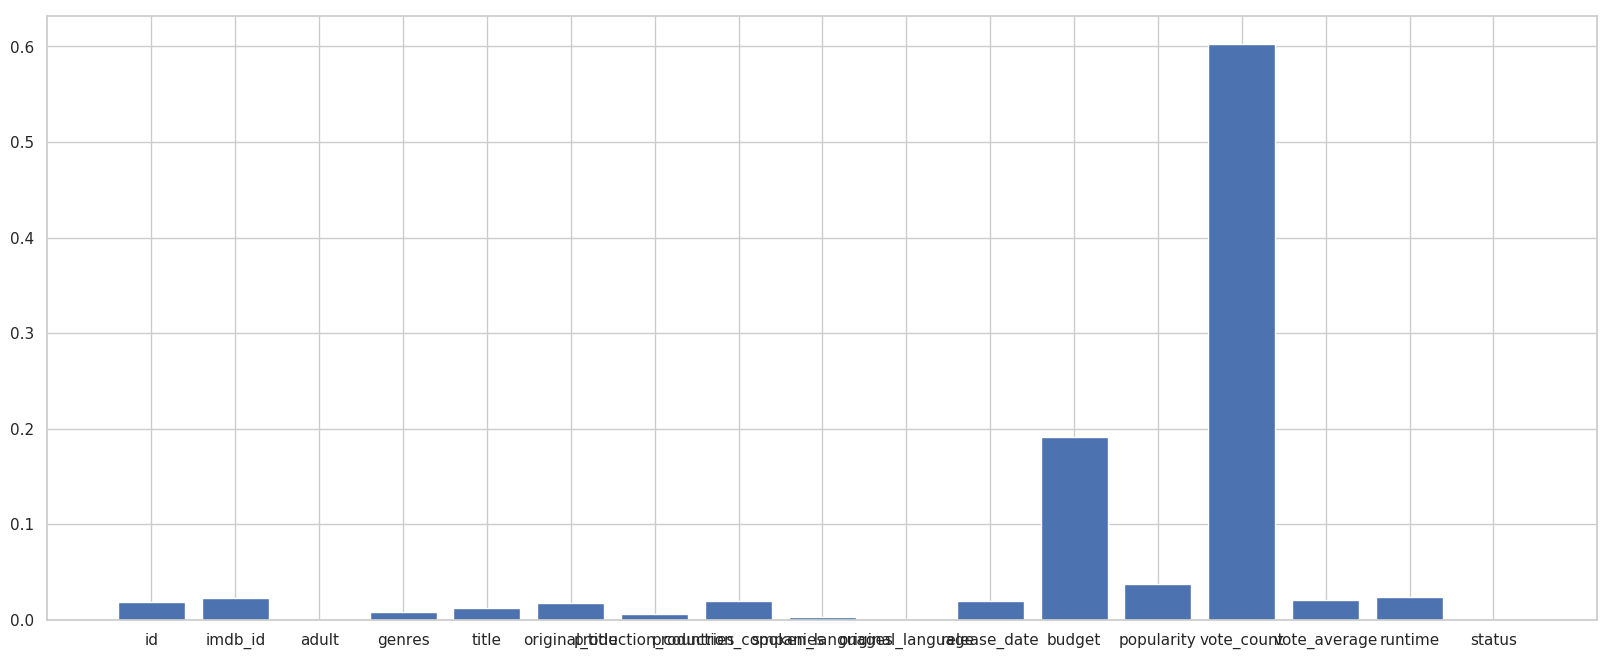

In [155]:
# Find out what features have most impact on revenue
plt.bar(np.arange(1, 18), regr.feature_importances_)
plt.xticks(np.arange(1, 18), datasetAux.columns)

R2: 0.960
MSE: 615962517418463.125

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


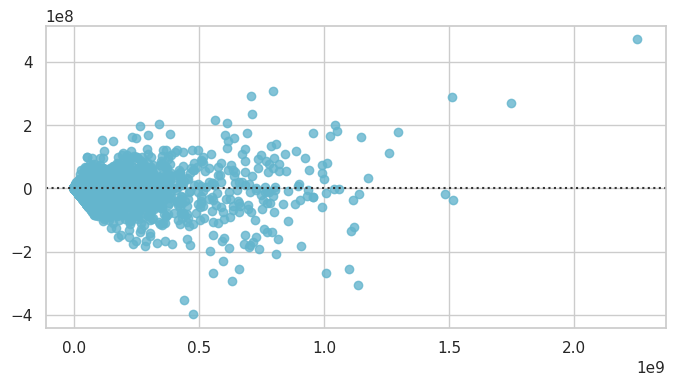

In [156]:
rcParams['figure.figsize'] = (8, 4)

# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="c")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

### Manipulate its hyperparameters -- better outcome performance!

In [157]:
rcParams['figure.figsize'] = (20, 8)

# Model initialize with different hyperparameters
regr = RandomForestRegressor(max_depth=20, max_features=10, n_estimators=60)
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x7f0f16f5fac8>,
 <a list of 17 Text xticklabel objects>)

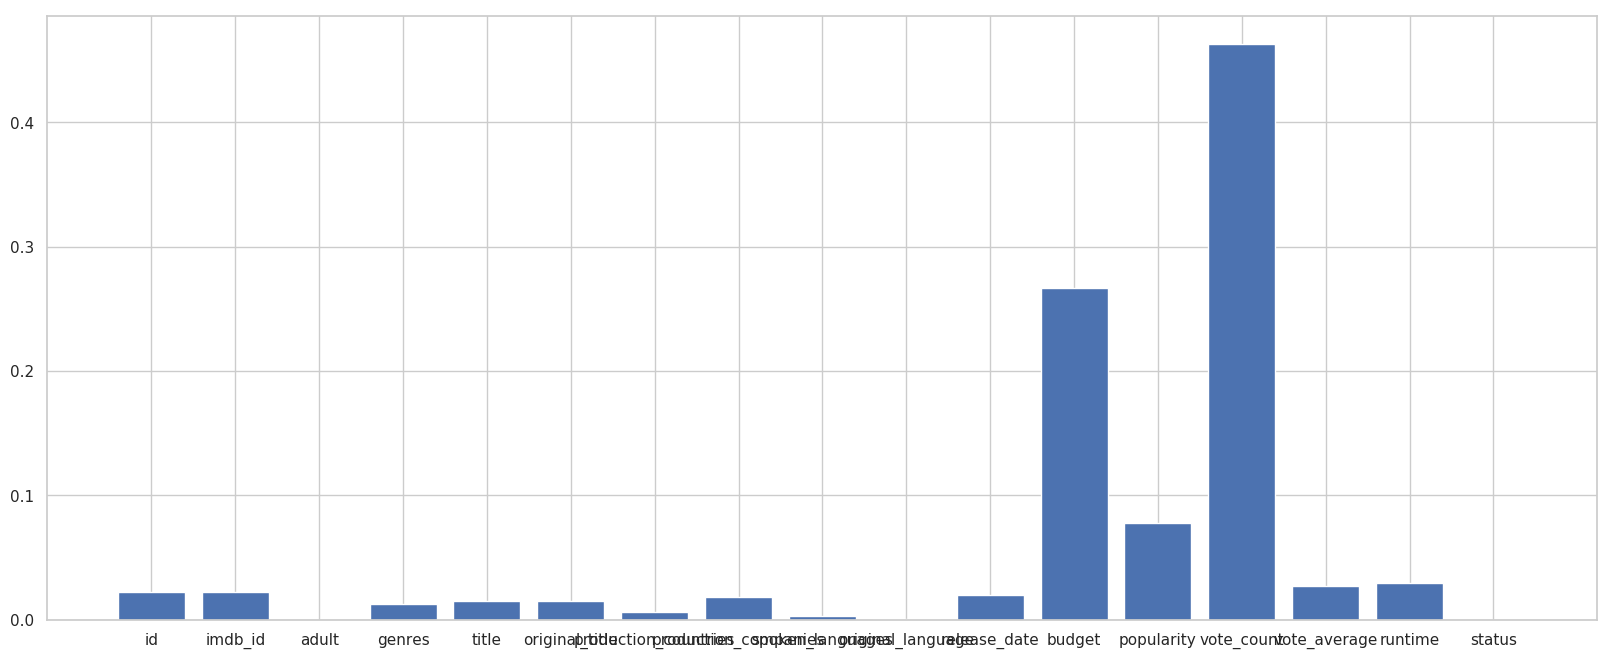

In [158]:
# Find out what features have most impact on revenue
plt.bar(np.arange(1, 18), regr.feature_importances_)
plt.xticks(np.arange(1, 18), datasetAux.columns)

R2: 0.969
MSE: 477735127752876.312

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


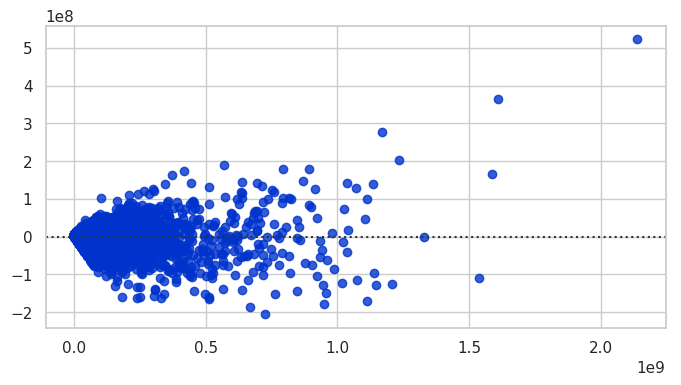

In [159]:
rcParams['figure.figsize'] = (8, 4)

# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="#0033cc")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

## Gradient Boosting Regressor


> **Documentation definition:** *Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.*



In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [161]:
datasetAux = dataset.iloc[:, 0:18]

datasetAux.head()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
0,862.0,17052.0,0.0,2.0,39018.0,36902.0,135.0,7296.0,15.0,20.0,10677.0,30000000.0,21.946943,5415.0,7.7,81.0,4.0,373554033.0
1,8844.0,16812.0,0.0,1.0,16806.0,16241.0,135.0,9561.0,15.0,20.0,10708.0,65000000.0,17.015539,2413.0,6.9,104.0,4.0,262797249.0
2,31357.0,17082.0,0.0,3.0,40428.0,38527.0,135.0,9640.0,15.0,20.0,10713.0,16000000.0,3.859495,34.0,6.1,127.0,4.0,81452156.0
3,11862.0,16703.0,0.0,3.0,11199.0,10835.0,135.0,8201.0,15.0,20.0,10509.0,0.0,8.387519,173.0,5.7,106.0,4.0,76578911.0
4,949.0,16769.0,0.0,0.0,13962.0,13372.0,135.0,7826.0,15.0,20.0,10708.0,60000000.0,17.924927,1886.0,7.7,170.0,4.0,187436818.0


### Default hyperparameters

In [162]:
# Model initialize
regr = GradientBoostingRegressor()
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2: 0.866
MSE: 2094629247476426.250

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


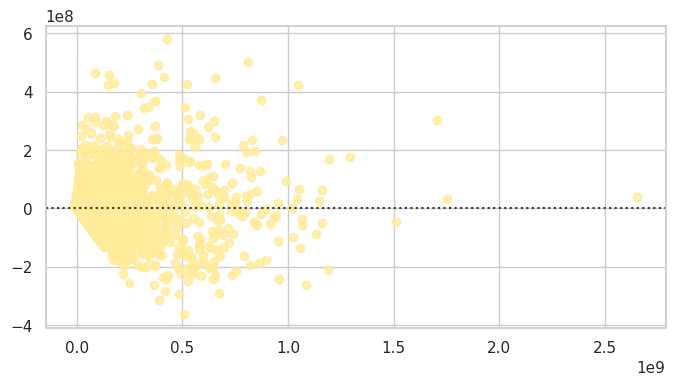

In [163]:
# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="#ffeb99")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

### Manipulate its hyperparameters -- better outcome performance!

In [164]:
# Model initialize
regr = GradientBoostingRegressor(n_estimators=300, max_depth=6, max_features=8)
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2: 0.987
MSE: 209942456157011.094

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


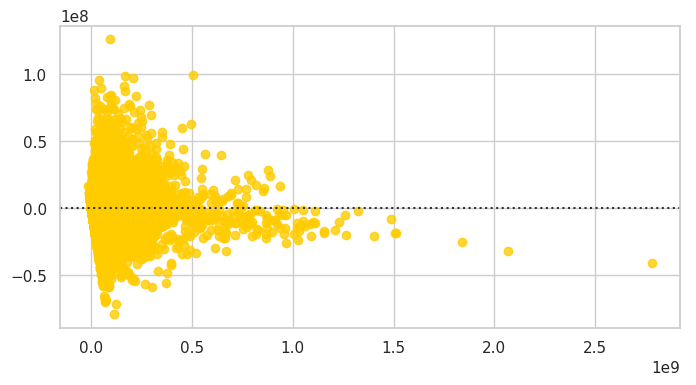

In [165]:
# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="#ffcc00")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

## Hist Gradient Boosting Regressor


> **Documentation definition:** *This estimator is much faster than GradientBoostingRegressor for big datasets (n_samples >= 10 000). The input data X is pre-binned into integer-valued bins, which considerably reduces the number of splitting points to consider, and allows the algorithm to leverage integer-based data structures. For small sample sizes, GradientBoostingRegressor might be preferred since binning may lead to split points that are too approximate in this setting.*



In [0]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

In [167]:
datasetAux = dataset.iloc[:, 0:18]

datasetAux.head()

,id,imdb_id,adult,genres,title,original_title,production_countries,production_companies,spoken_languages,original_language,release_date,budget,popularity,vote_count,vote_average,runtime,status,revenue
0,862.0,17052.0,0.0,2.0,39018.0,36902.0,135.0,7296.0,15.0,20.0,10677.0,30000000.0,21.946943,5415.0,7.7,81.0,4.0,373554033.0
1,8844.0,16812.0,0.0,1.0,16806.0,16241.0,135.0,9561.0,15.0,20.0,10708.0,65000000.0,17.015539,2413.0,6.9,104.0,4.0,262797249.0
2,31357.0,17082.0,0.0,3.0,40428.0,38527.0,135.0,9640.0,15.0,20.0,10713.0,16000000.0,3.859495,34.0,6.1,127.0,4.0,81452156.0
3,11862.0,16703.0,0.0,3.0,11199.0,10835.0,135.0,8201.0,15.0,20.0,10509.0,0.0,8.387519,173.0,5.7,106.0,4.0,76578911.0
4,949.0,16769.0,0.0,0.0,13962.0,13372.0,135.0,7826.0,15.0,20.0,10708.0,60000000.0,17.924927,1886.0,7.7,170.0,4.0,187436818.0


### Default hyperparameters

In [168]:
# Model initialize
regr = HistGradientBoostingRegressor()
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=256,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0)

R2: 0.924
MSE: 1187274151083469.500

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


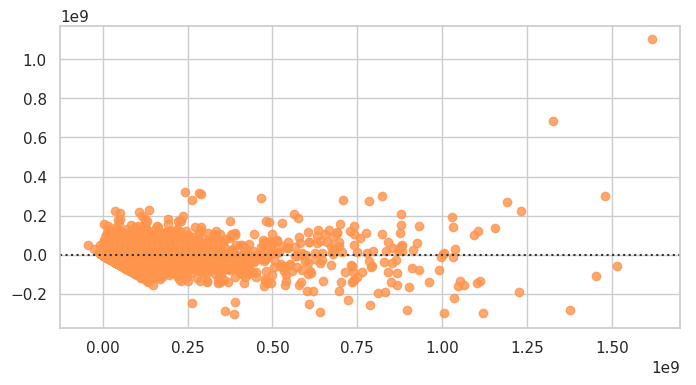

In [169]:
# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="#ff944d")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")

### Manipulate its hyperparameters -- better outcome performance!

In [170]:
# Model initialize
regr = HistGradientBoostingRegressor(max_iter=200, max_depth=12, min_samples_leaf=10)
regr.fit(datasetAux.iloc[:, 0:17].values, datasetAux[['revenue']].values.reshape(datasetAux[['revenue']].shape[0],))

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=256, max_depth=12,
                              max_iter=200, max_leaf_nodes=31,
                              min_samples_leaf=10, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0)

R2: 0.976
MSE: 368803116074367.375

Coefficients: [[-6.89022603e+00  1.10049450e+03  1.29302255e+07 -3.14222307e+05
  -8.16805450e+01  9.31078012e+01  6.19543538e+04  3.62627510e+02
   1.26920779e+05  2.19255132e+05 -4.57253271e+03  1.58235290e+00
   8.30743708e+05  6.86679699e+04 -1.94931597e+06 -7.37014544e+04
  -1.46364598e+06]]


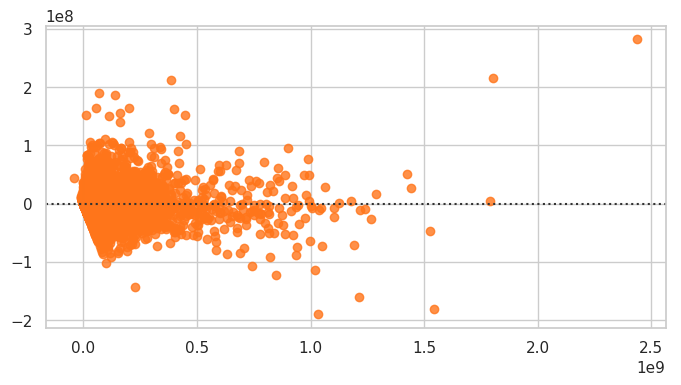

In [171]:
# Predict Model
predict = regr.predict(datasetAux.iloc[:, 0:17])

sns.set(style="whitegrid")
sns.residplot(predict, datasetAux[['revenue']], color="#ff751a")


# Measure Model Performance
mse = mean_squared_error(datasetAux[['revenue']], predict)
r2 = r2_score(datasetAux[['revenue']], predict)

  print(f"R2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"\nCoefficients: {model.coef_}")